In [1]:
# importing all the required libraries which are used for the webscraping and EDA.

import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# collecting the data and checking whether the url is correct or not
# <Response [200]> means success.

page = requests.get('https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=1')
page

<Response [200]>

## Extraction of Data

In [3]:
# Extracting the data

soup = BeautifulSoup(page.text)
soup

<!DOCTYPE html>
<html lang="en"><head><meta content="text/html; charset=utf-8" http-equiv="Content-type"/><title>Property for Sale in Nagpur | 6194+ Nagpur Properties for sale</title><meta content="Search 6194+ Properties for sale in Nagpur on Makaan.com. Find ✓1430+ New Projects for sale. ✓2471+ Flats/Apartments. ✓187+ Houses/Villas. Visit Now !" name="description"/><meta content="Buy Nagpur Properties, Residential Property for sale in Nagpur, Property for sale in Nagpur, Nagpur Property Sale" name="keywords"/><meta content="#fff" id="themeColor" name="theme-color"/><meta content="origin" name="referrer"/><meta content="55ce01b3ca93c05fd5a41439a23dd0d9" name="p:domain_verify"/><meta content="155462194517712" name="fb:pages"/><meta content="India" name="country"/><meta content="website" name="og:type"/><meta content="Makaan.com" name="og:site_name"/><meta content="http://static.makaan.com/6/25/355/nagpur-heroshot-2970721.jpeg" name="og:image:url"/><meta content="minimum-scale=1.0, widt

In [4]:
# Extracting all Data from Makaan website.[First Page]

seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

# 1. Seller Name
seller_name = soup.find_all('a',class_='seller-name')
for i in seller_name:
    a = i.text
    seller.append(a)
    
# 2. Seller type
seller_type = soup.find_all('div',class_='second-line')
for i in seller_type:
    a = i.text
    sellertype.append(a)
    
# 3. BHK
BHK = soup.find_all('a',class_='typelink')
for i in BHK:
    a = i.text
    BHKs.append(a)
    
# 4. Location
loc = soup.find_all("a",class_="loclink")
for i in loc:
    a = i.text
    location.append(a)
    
# 5. City
city = soup.find_all("span",class_="cityName")
for i in city:
    a = i.text
    City.append(a)

# 6. Total Price
total_price = soup.find_all("td",class_="price")
for i in total_price:
    a = i.text
    Price.append(a)

# 7. price per sqft
price_per_sqft = soup.find_all("td",class_="lbl rate")
for i in price_per_sqft:
    a = i.text
    b = a.replace('/ sq ft','')
    Price_per_sqft.append(b)
    
# 8. Area in Sqft
Area_in_sqft = soup.find_all('td',class_='size')
for i in Area_in_sqft:
    a = i.text
    Area_sqft.append(a)
    
# 9. Construction status
cons_stus = soup.find_all('td',class_='val')
for i in cons_stus :
    a = i.text
    Cons_status.append(a)
    
    
# Checking the length of column

print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

20
20
20
20
20
20
20
20
20


In [5]:
# Creating a DataFrame

Dictionary = {
    
    'Seller_Name' : seller,
    'Seller_type' : sellertype,
    'BHK' : BHKs,
    'Location' : location,
    'City' : City,
    'Total_Price' : Price,
    'price_per_sqft' : Price_per_sqft,
    'Area_sqft' : Area_sqft,
    'Construction_status' : Cons_status
}

In [6]:
df1 = pd.DataFrame(Dictionary)
df1

,Seller_Name,Seller_type,BHK,Location,City,Total_Price,price_per_sqft,Area_sqft,Construction_status
0,Shree Laxmi Venture,BUILDER,2 BHK Apartment,"Besa, Nagpur",Nagpur,35.31 L,"3,455",1022,Under Construction
1,Devprath Constructions LLP,BUILDER,2 BHK Apartment,"Parsodi, Nagpur",Nagpur,31.53 L,"3,500",901,Under Construction
2,Sirsikar Developers And Builders Pvt Ltd,BUILDER,1 BHK Apartment,"Buti Bori, Nagpur",Nagpur,14.49 L,"2,636",550,Under Construction
3,Sandesh Infrastrctures Pvt ltd,BUILDER,2 BHK Apartment,"Jamtha, Nagpur",Nagpur,22.95 L,"2,342",980,Under Construction
4,Shree Laxmi Venture,BUILDER,2 BHK Apartment,"Besa, Nagpur",Nagpur,35.31 L,"3,297",1071,Under Construction
5,Devprath Constructions LLP,BUILDER,2 BHK Apartment,"Parsodi, Nagpur",Nagpur,38.15 L,"3,500",1090,Under Construction
6,Sirsikar Developers And Builders Pvt Ltd,BUILDER,2 BHK Apartment,"Buti Bori, Nagpur",Nagpur,22 L,"2,895",760,Under Construction
7,Sandesh Infrastrctures Pvt ltd,BUILDER,3 BHK Villa,"Jamtha, Nagpur",Nagpur,49.01 L,"3,380",1450,Under Construction
8,seller,VERIFIED OWNER,2 BHK Apartment,"Jaitala, Nagpur",Nagpur,40.5 L,"4,500",900,Under Construction
9,seller,VERIFIED OWNER,2 BHK Apartment,"Adyali, Nagpur",Nagpur,67 L,"5,726",1170,Under Construction


## Collection Of Raw Data

In [7]:
# Extracting all Data from Makaan website


seller = []
sellertype =[]
BHKs = []
location = []
City = []
Price = []
Price_per_sqft = []
Area_sqft = []
Cons_status = []

# Extracting data for the city Nagpur.

for i in range(1,6):
    urls = 'https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=' +str(i)
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
    
# Extracting data for the city Mumbai.
    
for j in range(1,6):
    urls = 'https://www.makaan.com/mumbai-residential-property/buy-property-in-mumbai-city?page='+str(j)+'&_=1669777420623'
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
    
    
# Extracting data for the city Pune.    
    
for j in range(1,6):
    urls = 'https://www.makaan.com/pune-residential-property/buy-property-in-pune-city?page='+str(j)+'&_=1669778518952'
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
        
        
# Extracting data for the city Kolhapur.       
        
for j in range(1,2):
    urls = 'https://www.makaan.com/kolhapur-residential-property/buy-property-in-kolhapur-city'
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
        
# Extracting data for the city Nahik.        
        
for j in range(1,5):
    urls = 'https://www.makaan.com/nashik-residential-property/buy-property-in-nashik-city?page='+str(j)
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
        
        
        
# Extracting data for the city Aurangabad.       
        
for j in range(1,6):
    urls = 'https://www.makaan.com/aurangabad-residential-property/buy-property-in-aurangabad-city?page='+str(j)+'&_=1669788603520'
    print(urls)
    page = requests.get(urls)
    soup = BeautifulSoup(page.text)

    # 1. Seller Name
    
    seller_name = soup.find_all('a',class_='seller-name')
    for i in seller_name:
        a = i.text
        seller.append(a)
        
    # 2. Seller type
    
    seller_type = soup.find_all('div',class_='second-line')
    for i in seller_type:
        a = i.text
        sellertype.append(a)
        
    # 3. BHK
    
    BHK = soup.find_all('a',class_='typelink')
    for i in BHK:
        a = i.text
        BHKs.append(a)
    
    # 4. Location
    
    loc = soup.find_all("a",class_="loclink")
    for i in loc:
        a = i.text
        b=  a.split(',')[0]
        location.append(b)
        
    # 5. City
    
    city = soup.find_all("span",class_="cityName")
    for i in city:
        a = i.text
        City.append(a)
    
    # 6. Total Price
    
    total_price = soup.find_all("td",class_="price")
    for i in total_price:
        a = i.text
        Price.append(a)
    
    # 7. price per sqft
    
    price_per_sqft = soup.find_all("td",class_="lbl rate")
    for i in price_per_sqft:
        a = i.text
        b = a.replace('/ sq ft','')
        Price_per_sqft.append(b)
    
    # 8. Area in Sqft
    
    Area_in_sqft = soup.find_all('td',class_='size')
    for i in Area_in_sqft:
        a = i.text
        Area_sqft.append(a)
        
    # 9. Construction status
    
    cons_stus = soup.find_all('td',class_='val')
    for i in cons_stus :
        a = i.text
        Cons_status.append(a)
        
        
        
# Checking the length of column:

print(len(seller))
print(len(sellertype))
print(len(BHKs))
print(len(location))
print(len(City))
print(len(Price))
print(len(Price_per_sqft))
print(len(Area_sqft))
print(len(Cons_status))

# Creating a DataFrame:

Dictionary = {
    
    'Seller_Name' : seller,
    'Seller_type' : sellertype,
    'BHK' : BHKs,
    'Location' : location,
    'City' : City,
    'Total_Price' : Price,
    'price_per_sqft' : Price_per_sqft,
    'Area_sqft' : Area_sqft,
    'Construction_status' : Cons_status
}
df_final = pd.DataFrame(Dictionary)
df_final

https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=1
https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=2
https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=3
https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=4
https://www.makaan.com/nagpur-residential-property/buy-property-in-nagpur-city?_=1669628700661&page=5
https://www.makaan.com/mumbai-residential-property/buy-property-in-mumbai-city?page=1&_=1669777420623
https://www.makaan.com/mumbai-residential-property/buy-property-in-mumbai-city?page=2&_=1669777420623
https://www.makaan.com/mumbai-residential-property/buy-property-in-mumbai-city?page=3&_=1669777420623
https://www.makaan.com/mumbai-residential-property/buy-property-in-mumbai-city?page=4&_=1669777420623
https://www.makaan.com/mumbai-residential-property/buy-property-in-mumbai-city?pag

,Seller_Name,Seller_type,BHK,Location,City,Total_Price,price_per_sqft,Area_sqft,Construction_status
0,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,35.31 L,"3,455",1022,Under Construction
1,Devprath Constructions LLP,BUILDER,2 BHK Apartment,Parsodi,Nagpur,31.53 L,"3,500",901,Under Construction
2,Sirsikar Developers And Builders Pvt Ltd,BUILDER,1 BHK Apartment,Buti Bori,Nagpur,14.49 L,"2,636",550,Under Construction
3,Sandesh Infrastrctures Pvt ltd,BUILDER,2 BHK Apartment,Jamtha,Nagpur,22.95 L,"2,342",980,Under Construction
4,Shree Laxmi Venture,BUILDER,2 BHK Apartment,Besa,Nagpur,35.31 L,"3,297",1071,Under Construction
...,...,...,...,...,...,...,...,...,...
462,Gandhi Rajput,OWNER,Residential Plot,Harsul,Aurangabad,5.55 L,462,1200,Resale
463,shivaji patil,OWNER,Residential Plot,Shendra MIDC,Aurangabad,5 L,"1,562",320,Resale
464,Bhargav forcloser,AGENT,Residential Plot,Waluj,Aurangabad,43.39 L,"1,296",3346,Resale
465,Sanket Jagdale,OWNER,1 BHK Independent House,Farola,Aurangabad,12 L,"2,000",600,Ready to move


In [8]:
# Converting the (final data frame) to csv file.

df_final.to_csv(r"C:\Users\HP\OneDrive\Desktop\temp\sale.csv")

In [9]:
# Loading the Dataset for the cleaning purpose.
df_final = pd.read_csv(r"C:\Users\HP\OneDrive\Desktop\temp\sale.csv")

In [10]:
df_final.info()
df_final.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           467 non-null    int64 
 1   Seller_Name          467 non-null    object
 2   Seller_type          467 non-null    object
 3   BHK                  467 non-null    object
 4   Location             467 non-null    object
 5   City                 467 non-null    object
 6   Total_Price          467 non-null    object
 7   price_per_sqft       467 non-null    object
 8   Area_sqft            467 non-null    int64 
 9   Construction_status  467 non-null    object
dtypes: int64(2), object(8)
memory usage: 36.6+ KB


,Unnamed: 0,Area_sqft
count,467.000000,467.000000
mean,233.000000,1115.993576
std,134.955548,979.713610
min,0.000000,200.000000
25%,116.500000,671.000000
50%,233.000000,912.000000
75%,349.500000,1217.500000
max,466.000000,11000.000000


## Cleaning the Data

In [11]:
# Creating a function to convert 'L' and 'Cr' to numerical form 

def total_price_conv(x):
    newprice = 0
    if(x.find('L') > 0):
        newprice = float(x.replace('L','').strip())*100000
    elif(x.find('Cr')> 0):
        newprice = float(x.replace('Cr','').strip())*10000000
    return newprice

In [12]:
# applying function

df_final.Total_Price = df_final.Total_Price.apply(total_price_conv)

In [13]:
# drop unnecessory column

df_final.drop(['Unnamed: 0'],axis = 1, inplace = True)

In [14]:
# Converting the dtypes of the each column to actual dtype or required dtype.

df_final.Seller_Name = df_final.Seller_Name.astype('category')
df_final.Seller_type = df_final.Seller_type.astype('category')
df_final.BHK = df_final.BHK.astype('category')
df_final.Location = df_final.Location.astype('category')
df_final.City = df_final.City.astype('category')
df_final.Total_Price = df_final.Total_Price.astype('int64')
df_final.price_per_sqft = df_final.price_per_sqft.str.replace(',','').astype('int64')
df_final.Area_sqft = df_final.Area_sqft.astype('int64')
df_final.Construction_status = df_final.Construction_status.astype('category')

In [15]:
df_final.info()
df_final.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Seller_Name          467 non-null    category
 1   Seller_type          467 non-null    category
 2   BHK                  467 non-null    category
 3   Location             467 non-null    category
 4   City                 467 non-null    category
 5   Total_Price          467 non-null    int64   
 6   price_per_sqft       467 non-null    int64   
 7   Area_sqft            467 non-null    int64   
 8   Construction_status  467 non-null    category
dtypes: category(6), int64(3)
memory usage: 27.1 KB


,Seller_Name,Seller_type,BHK,Location,City,Total_Price,price_per_sqft,Area_sqft,Construction_status
count,467,467,467,467,467,4.670000e+02,467.00000,467.000000,467
unique,185,4,18,196,6,NaN,NaN,NaN,4
top,seller,BUILDER,2 BHK Apartment,Jamtha,Mumbai,NaN,NaN,NaN,Under Construction
freq,109,237,196,15,100,NaN,NaN,NaN,245
mean,NaN,NaN,NaN,NaN,NaN,7.399520e+06,7797.91863,1115.993576,NaN
std,NaN,NaN,NaN,NaN,NaN,7.376585e+06,7489.71255,979.713610,NaN
min,NaN,NaN,NaN,NaN,NaN,1.500000e+05,136.00000,200.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,3.007500e+06,3416.50000,671.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,4.944000e+06,5734.00000,912.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,8.400000e+06,8532.00000,1217.500000,NaN


In [16]:
# Creating another df to convert building type into some pre-defined types
df_final.BHK.str.split()

0               [2, BHK, Apartment]
1               [2, BHK, Apartment]
2               [1, BHK, Apartment]
3               [2, BHK, Apartment]
4               [2, BHK, Apartment]
                   ...             
462             [Residential, Plot]
463             [Residential, Plot]
464             [Residential, Plot]
465    [1, BHK, Independent, House]
466                 [3, BHK, Villa]
Name: BHK, Length: 467, dtype: object

In [17]:
prop_type = []
for i in df_final.BHK.str.split():
    a = i[-1]
    prop_type.append(a)
print(prop_type)

['Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Villa', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Floor', 'Apartment', 'Plot', 'Plot', 'Plot', 'Apartment', 'Apartment', 'Plot', 'Apartment', 'Plot', 'Plot', 'Apartment', 'Apartment', 'House', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Plot', 'Plot', 'Plot', 'House', 'House', 'Apartment', 'Floor', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'House', 'Apartment', 'Apartment', 'Apartment', 'House', 'Apartment', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Plot', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'House', 'Apartment', 'Plot', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'House', 'House', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apartment', 'Apart

In [18]:
df_prop = pd.DataFrame(prop_type)


In [19]:

df_prop.columns = ['prop_name']
prop_name = df_prop.prop_name.str.replace('Plot', 'Residential Plot').str.replace('House', 'Independent House/floor').str.replace('Floor', 'Independent House/floor')
prop_name

0                    Apartment
1                    Apartment
2                    Apartment
3                    Apartment
4                    Apartment
                ...           
462           Residential Plot
463           Residential Plot
464           Residential Plot
465    Independent House/floor
466                      Villa
Name: prop_name, Length: 467, dtype: object

In [20]:
df_prop

,prop_name
0,Apartment
1,Apartment
2,Apartment
3,Apartment
4,Apartment
...,...
462,Plot
463,Plot
464,Plot
465,House


In [21]:
city = df_final.City
location = df_final.Location
price = df_final.Total_Price
seller_type = df_final.Seller_type
cons_status = df_final.Construction_status
price_per_sqft = df_final.price_per_sqft
seller_name = df_final.Seller_Name
property_type = df_final.BHK
area_sqft = df_final.Area_sqft

In [22]:
df_prop['city'] = city
df_prop['location'] = location
df_prop['prop_name'] = prop_name
df_prop['price'] = price
df_prop['seller_type'] = seller_type
df_prop['cons_status'] = cons_status
df_prop['area_sqft'] = area_sqft
df_prop['cons_status'] = seller_name
df_prop['Property_type'] = property_type

In [23]:
df_prop

,prop_name,city,location,price,seller_type,cons_status,area_sqft,Property_type
0,Apartment,Nagpur,Besa,3531000,BUILDER,Shree Laxmi Venture,1022,2 BHK Apartment
1,Apartment,Nagpur,Parsodi,3153000,BUILDER,Devprath Constructions LLP,901,2 BHK Apartment
2,Apartment,Nagpur,Buti Bori,1449000,BUILDER,Sirsikar Developers And Builders Pvt Ltd,550,1 BHK Apartment
3,Apartment,Nagpur,Jamtha,2295000,BUILDER,Sandesh Infrastrctures Pvt ltd,980,2 BHK Apartment
4,Apartment,Nagpur,Besa,3531000,BUILDER,Shree Laxmi Venture,1071,2 BHK Apartment
...,...,...,...,...,...,...,...,...
462,Residential Plot,Aurangabad,Harsul,555000,OWNER,Gandhi Rajput,1200,Residential Plot
463,Residential Plot,Aurangabad,Shendra MIDC,500000,OWNER,shivaji patil,320,Residential Plot
464,Residential Plot,Aurangabad,Waluj,4339000,AGENT,Bhargav forcloser,3346,Residential Plot
465,Independent House/floor,Aurangabad,Farola,1200000,OWNER,Sanket Jagdale,600,1 BHK Independent House


## Identifying Outliers

In [24]:
# Identifying the outliers for the Price
x= np.percentile(df_final["Total_Price"],[25,50,75])
Q1=x[0]
Q2=x[1]
Q3=x[2]
IQR=Q3-Q1
IQR

5392500.0

In [25]:
# IQR= Intile Quartile Range
# UL= Upper Limit
# LL= Lower Limit

IQR = Q3-Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR

print(IQR, UL, LL)

5392500.0 16488750.0 -5081250.0


In [26]:
(df_final[(df_final.Total_Price > UL) | (df_final.Total_Price < LL)]).count()     

Seller_Name            45
Seller_type            45
BHK                    45
Location               45
City                   45
Total_Price            45
price_per_sqft         45
Area_sqft              45
Construction_status    45
dtype: int64

<AxesSubplot:>

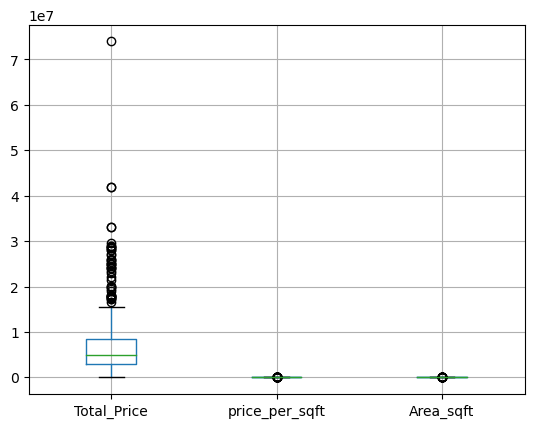

In [27]:
df_final.boxplot()

## Data Analysis

## Univariate Analysis

In [28]:
plt.figure(figsize = (15,10),dpi = 100)

# histogram with density plot to get the mean and median for Total Price

plt.subplot(3,1,1)
sns.histplot(df_final.Total_Price, stat = 'density')
sns.kdeplot(df_final.Total_Price, color = 'blue')
plt.axvline(df_final.Total_Price.mean(), color ='red', label = 'Mean')
plt.axvline(df_final.Total_Price.median(), color ='green', label = 'Median')
plt.legend();

# histogram with density plot to get the mean and median for Price per sqft

plt.subplot(3,1,2)
sns.histplot(df_final.price_per_sqft, stat = 'density')
sns.kdeplot(df_final.price_per_sqft, color = 'blue')
plt.axvline(df_final.price_per_sqft.mean(), color ='red', label = 'Mean')
plt.axvline(df_final.price_per_sqft.median(), color ='green', label = 'Median')
plt.legend();

# histogram with desity plot to get the mean and median for Area in sqft

plt.subplot(3,1,3)
sns.histplot(df_final.Area_sqft, stat = 'density')
sns.kdeplot(df_final.Area_sqft, color = 'blue')
plt.axvline(df_final.Area_sqft.mean(), color ='red', label = 'Mean')
plt.axvline(df_final.Area_sqft.median(), color ='green', label = 'Median')
plt.legend();

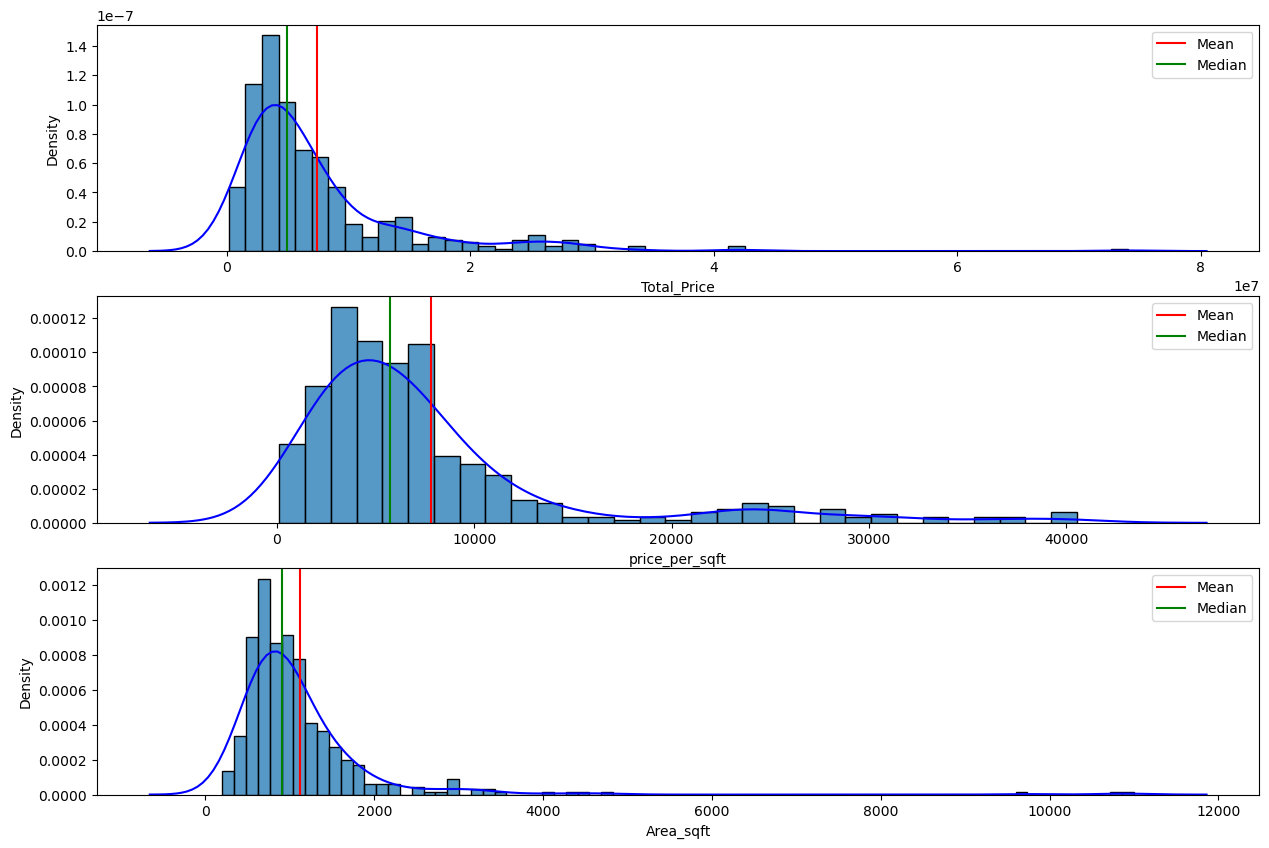

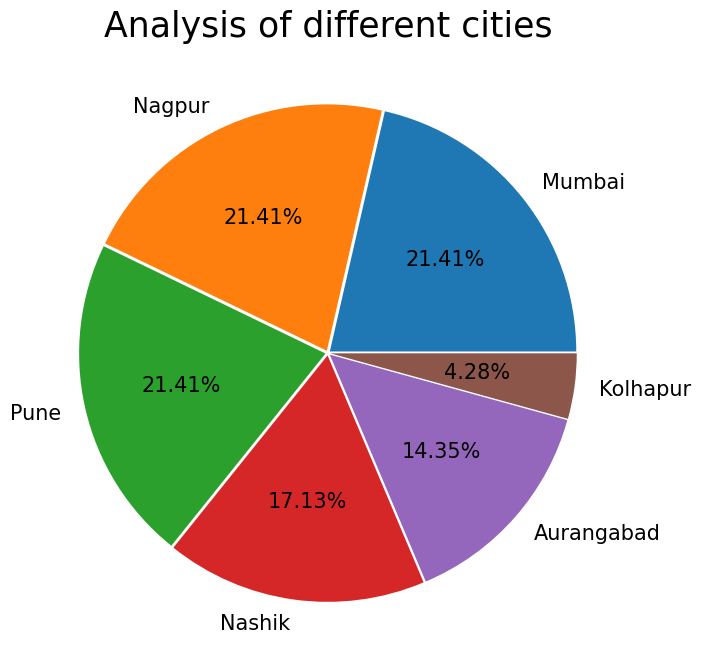

In [29]:
# pie chart to show Analysis of different cities

plt.figure(figsize = (8,8))
plt.pie(x = df_final.City.value_counts().values,
        labels = df_final.City.value_counts().index, autopct = '%.2f%%',textprops={"fontsize":15})
plt.title('Analysis of different cities', fontsize = 25, color = 'black')

plt.show();

In [30]:
# how much data is there from every city?
# 21.41% of data is there from Pune, Nagpur and Mumbai each, 17.13% of data is there from Nashik 14.35% of data is there from 
# Aurangabad and 4.28%  of data is there from Kolhapur

In [31]:
# count plot for construction status column.

plt.figure(figsize=(6,4), dpi = 100)
sns.countplot(x = df_final.Construction_status)
plt.title('Status of construction');

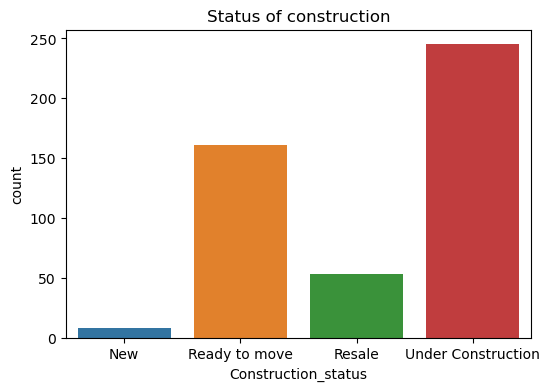

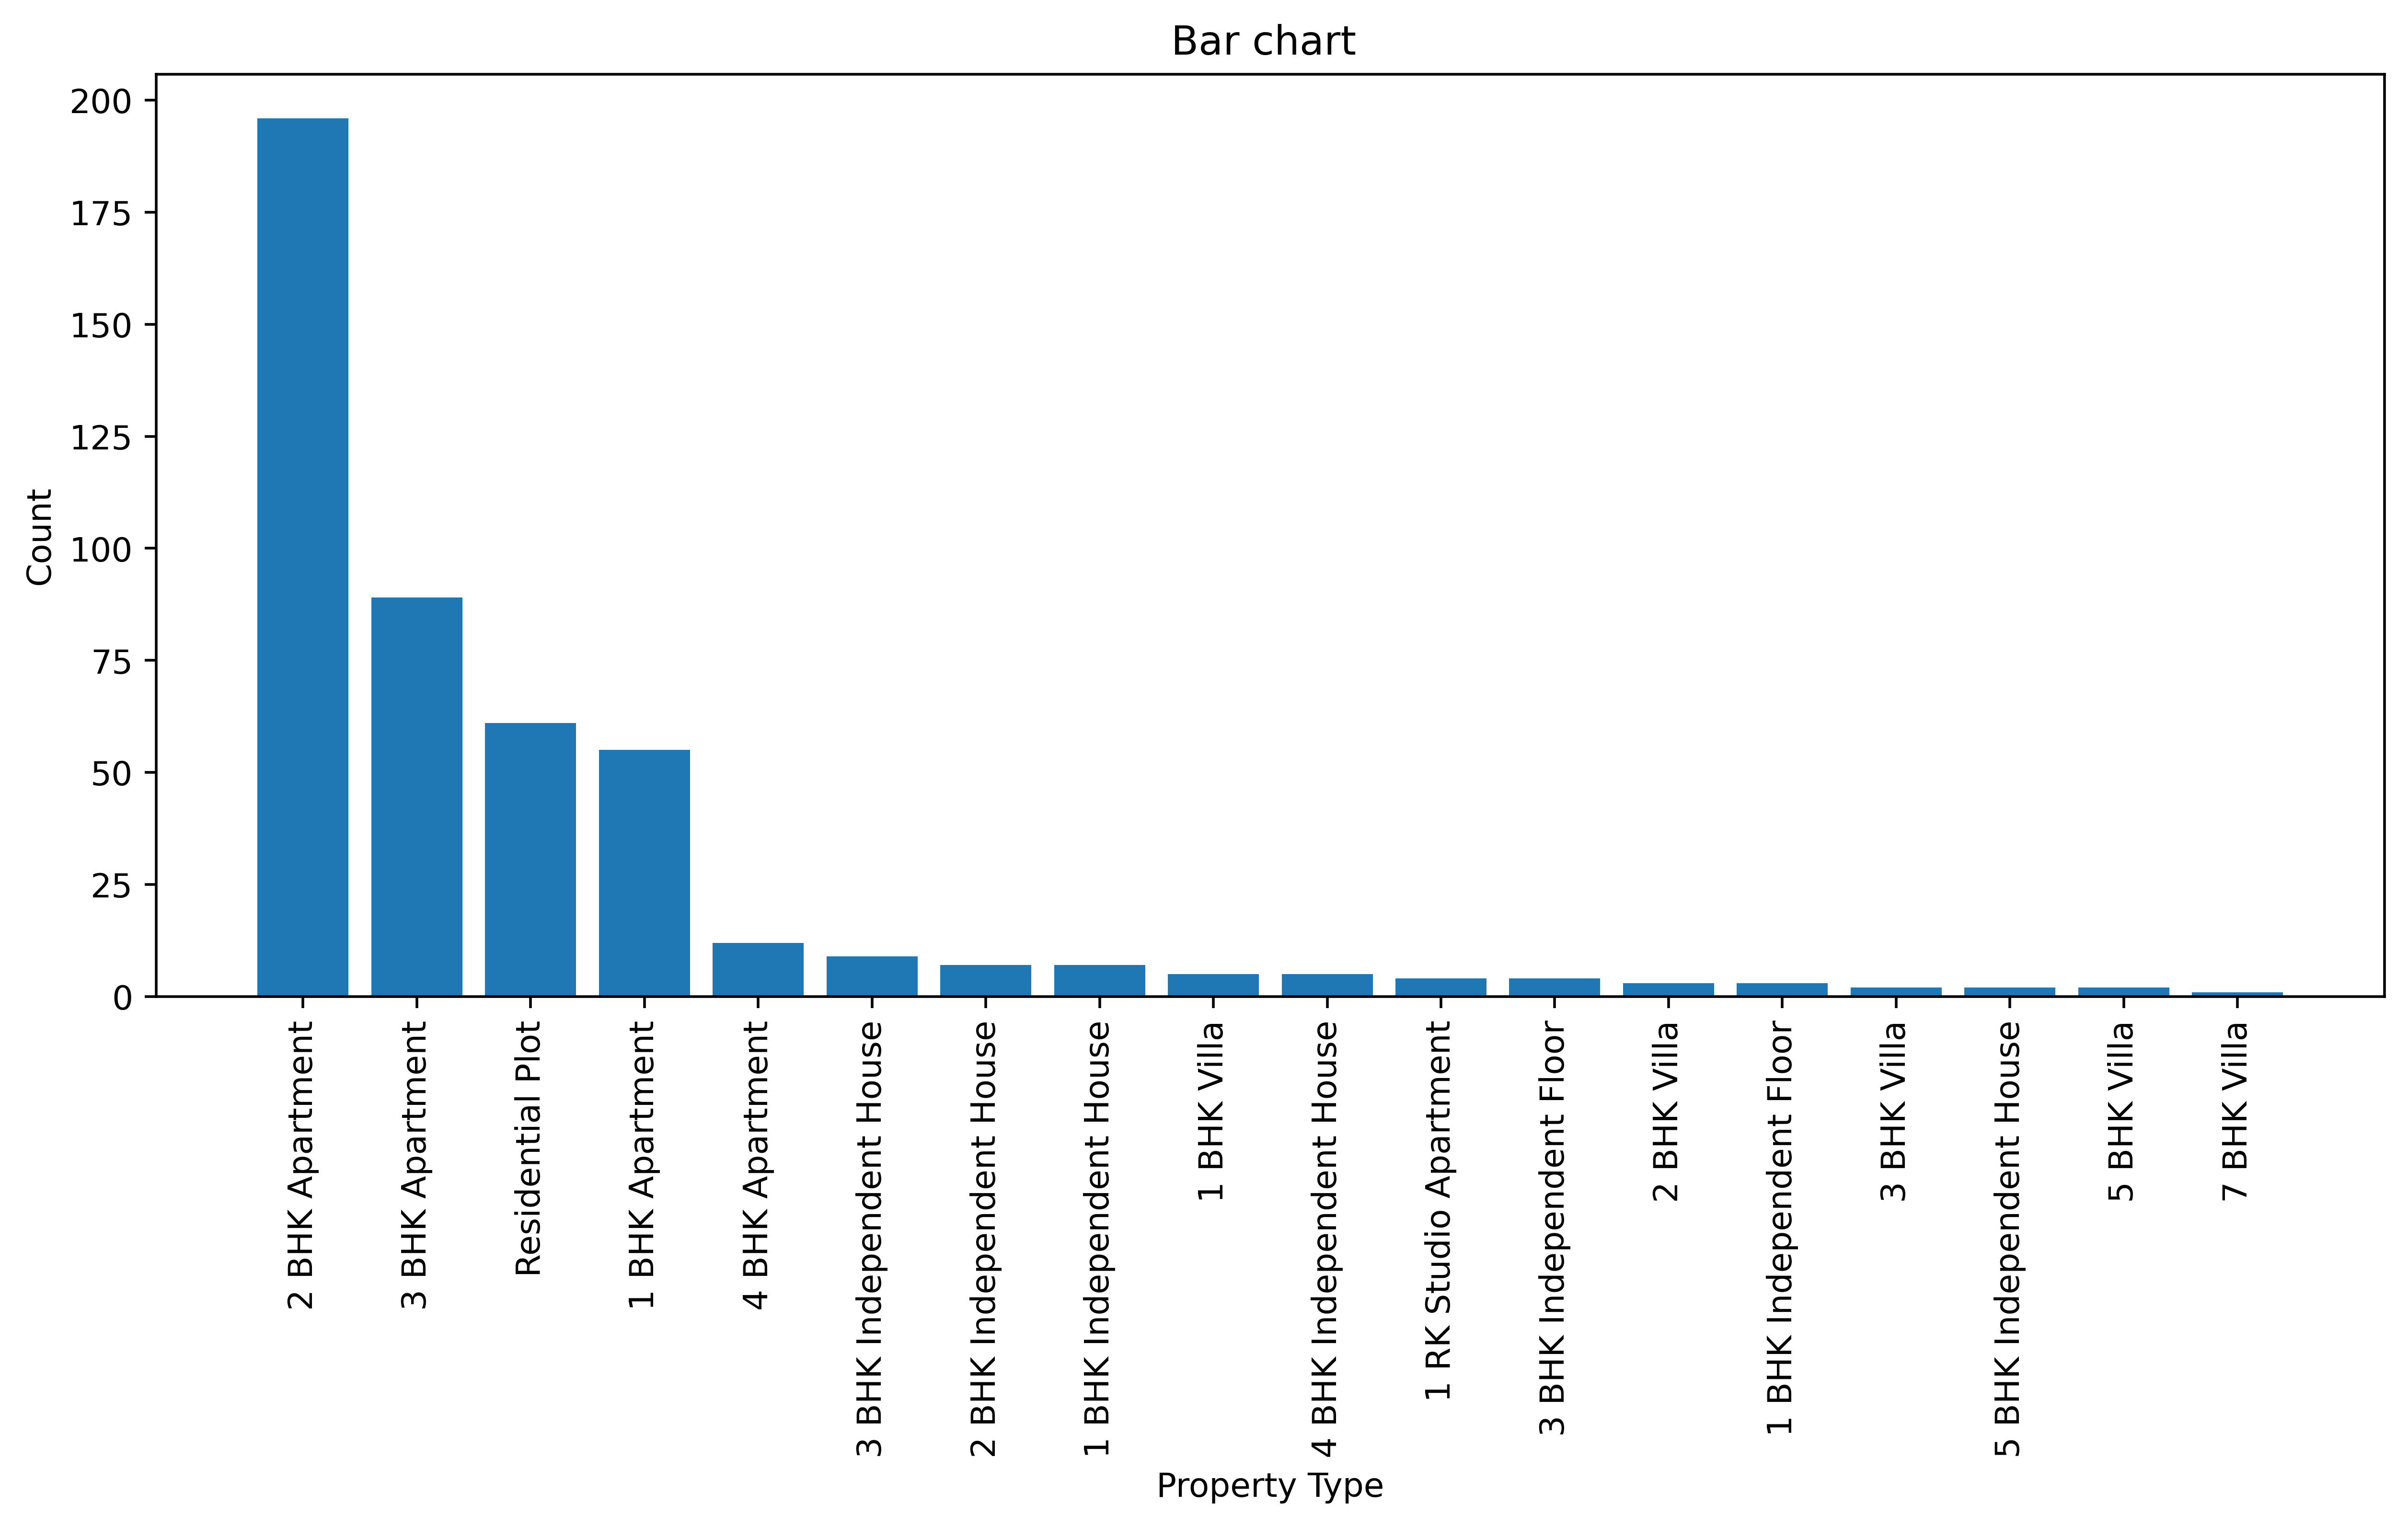

In [32]:
# bar chart

Property = df_final.BHK.value_counts().index
count = df_final.BHK.value_counts().values
 
plt.figure(figsize=(12,5), dpi = 500)
plt.bar(Property,count)

plt.title('Bar chart ')
plt.xlabel('Property Type',fontsize = 10, color = 'black')
plt.ylabel('Count',fontsize = 10, color = 'black')
plt.xticks(rotation = 90)
plt.show();

In [33]:
# What is the status of constuction of the homes?
# around 10-15 sites are newly build and more than 150 sites are ready to move also more than 50 sites are for resale and 
# around 250 sites are under construction
# Also there is analysis of number of counts of different types of sites like around 200 sites are 2BHK Apartments and many more


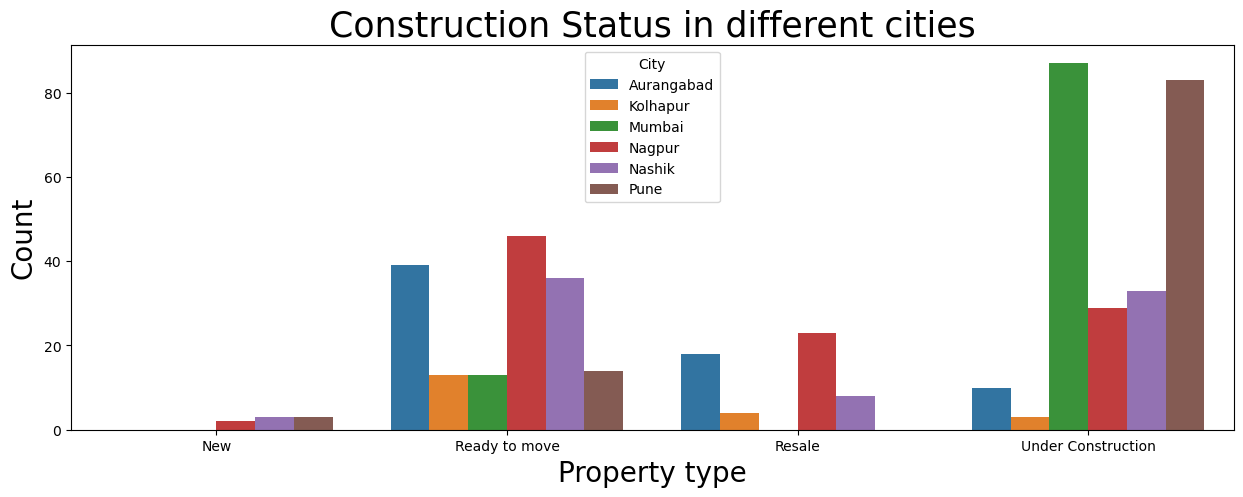

In [34]:
# Construction Status in different cities using countplot.

plt.figure(figsize =(15,5))
# colors = ["c", 'm','r','y','g','b']
sns.countplot(x= 'Construction_status', hue = 'City', data = df_final);
plt.title('Construction Status in different cities', fontsize = 25, color = 'black')
plt.xlabel('Property type',fontsize = 20, color = 'black')
plt.ylabel('Count',fontsize = 20, color = 'black');
plt.show()

In [35]:
# this shows city wise construction status of the sites

# Newly built sites are the least number of sites in our data.
#Nagpur, Pune and Nashik has newly built sites which are also less in numbers

# Second-most number of sites are Ready to move
# Every city has homes which are ready to move.
#Nagpur has the most number of ready to move homes and Kolhapur and Mumbai has least numbers of ready to move sites

# Seond-least number of sites are Resale sites.
# Mumbai and Pune does not have any resale properties and Nagpur has the most number of resale sites

# In our data most number of sites are Under construction.
# Mumbai and Pune has the most number of under construction sites and Kolhapur has least number of under construction sites

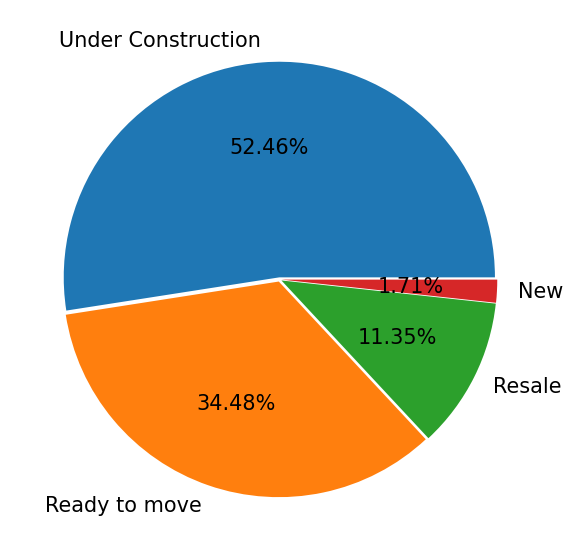

In [36]:
# Pie chart to show percentage of construction status

plt.figure(figsize = (7,7))
plt.pie(x = df_final.Construction_status.value_counts(),
        labels = df_final.Construction_status.value_counts().index, autopct = '%.2f%%', explode=[0.01,0.01,0.01,0.01]
       ,textprops={"fontsize":15})
plt.show();

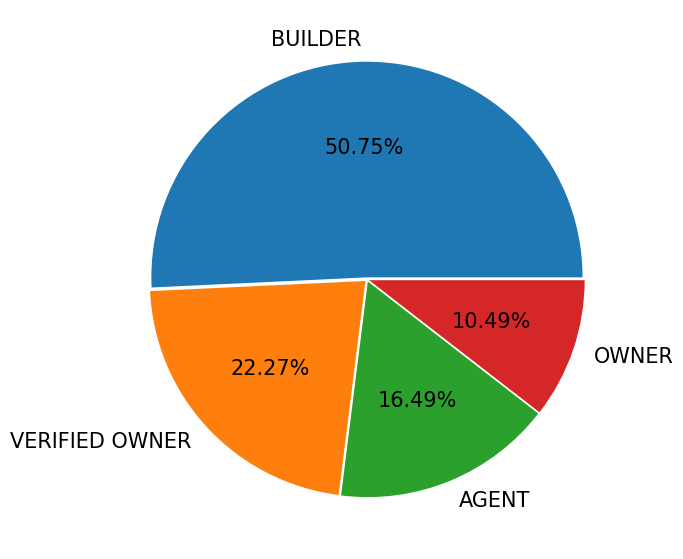

In [37]:
# Pie chart to show the cities seller type

plt.figure(figsize = (7,7))
plt.pie(x = df_final.Seller_type.value_counts(),
        labels = df_final.Seller_type.value_counts().index, autopct = '%.2f%%',explode=[0.01,0.01,0.01,0.01]
        ,textprops={"fontsize":15})
plt.show();

In [38]:
# Who are the sellers of the homes?
# like 50.75% of sites are being sold by the Builders, around 11% of the houses are being sold by their owners 16% of sites are
# being sold by the agents and around 23% of sites being sold by the verified owners
# How many Propertoes are being sold by the Builders?
# How many Propertoes are being sold by the Owners?
# How many Propertoes are being sold by the Verifed Owners?
# How many Propertoes are being sold by the Agents?

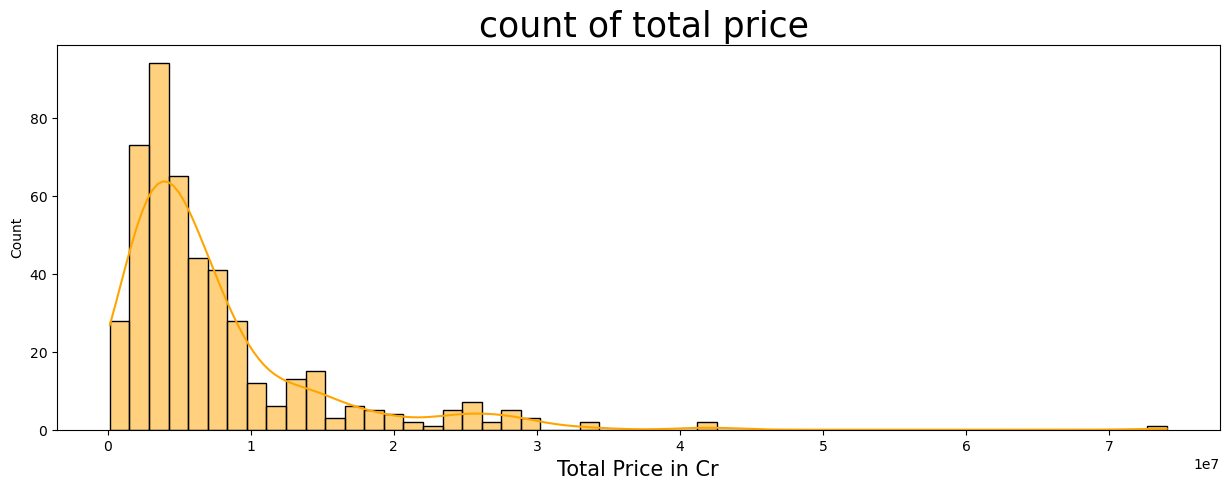

In [39]:
# Histogram with density plot showing count of total price in DataFrame

plt.figure(figsize=(15,5))

plt.title(' count of total price', fontsize = 25, color = 'black')
plt.xlabel('Total Price in Cr',fontsize = 15, color = 'black')

sns.histplot( x = df_final.Total_Price, data = df_final, color = 'orange', kde = True);
plt.show()

In [40]:
# From here we can say that most of the sites are in range of 0-2Cr.

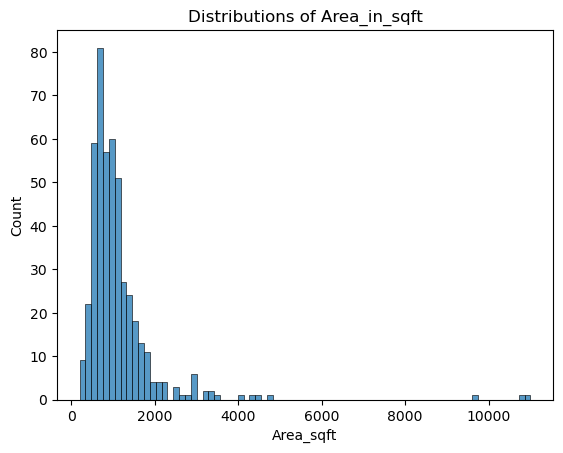

In [41]:
# Distribution of Area in sqft and its count
sns.histplot(df_final.Area_sqft)
plt.title('Distributions of Area_in_sqft');
plt.show()

In [42]:
#What is the count of sites according to area per square ft?
# maximum number of sites are in between 0- 2000 sqft

## Bivariate Analysis

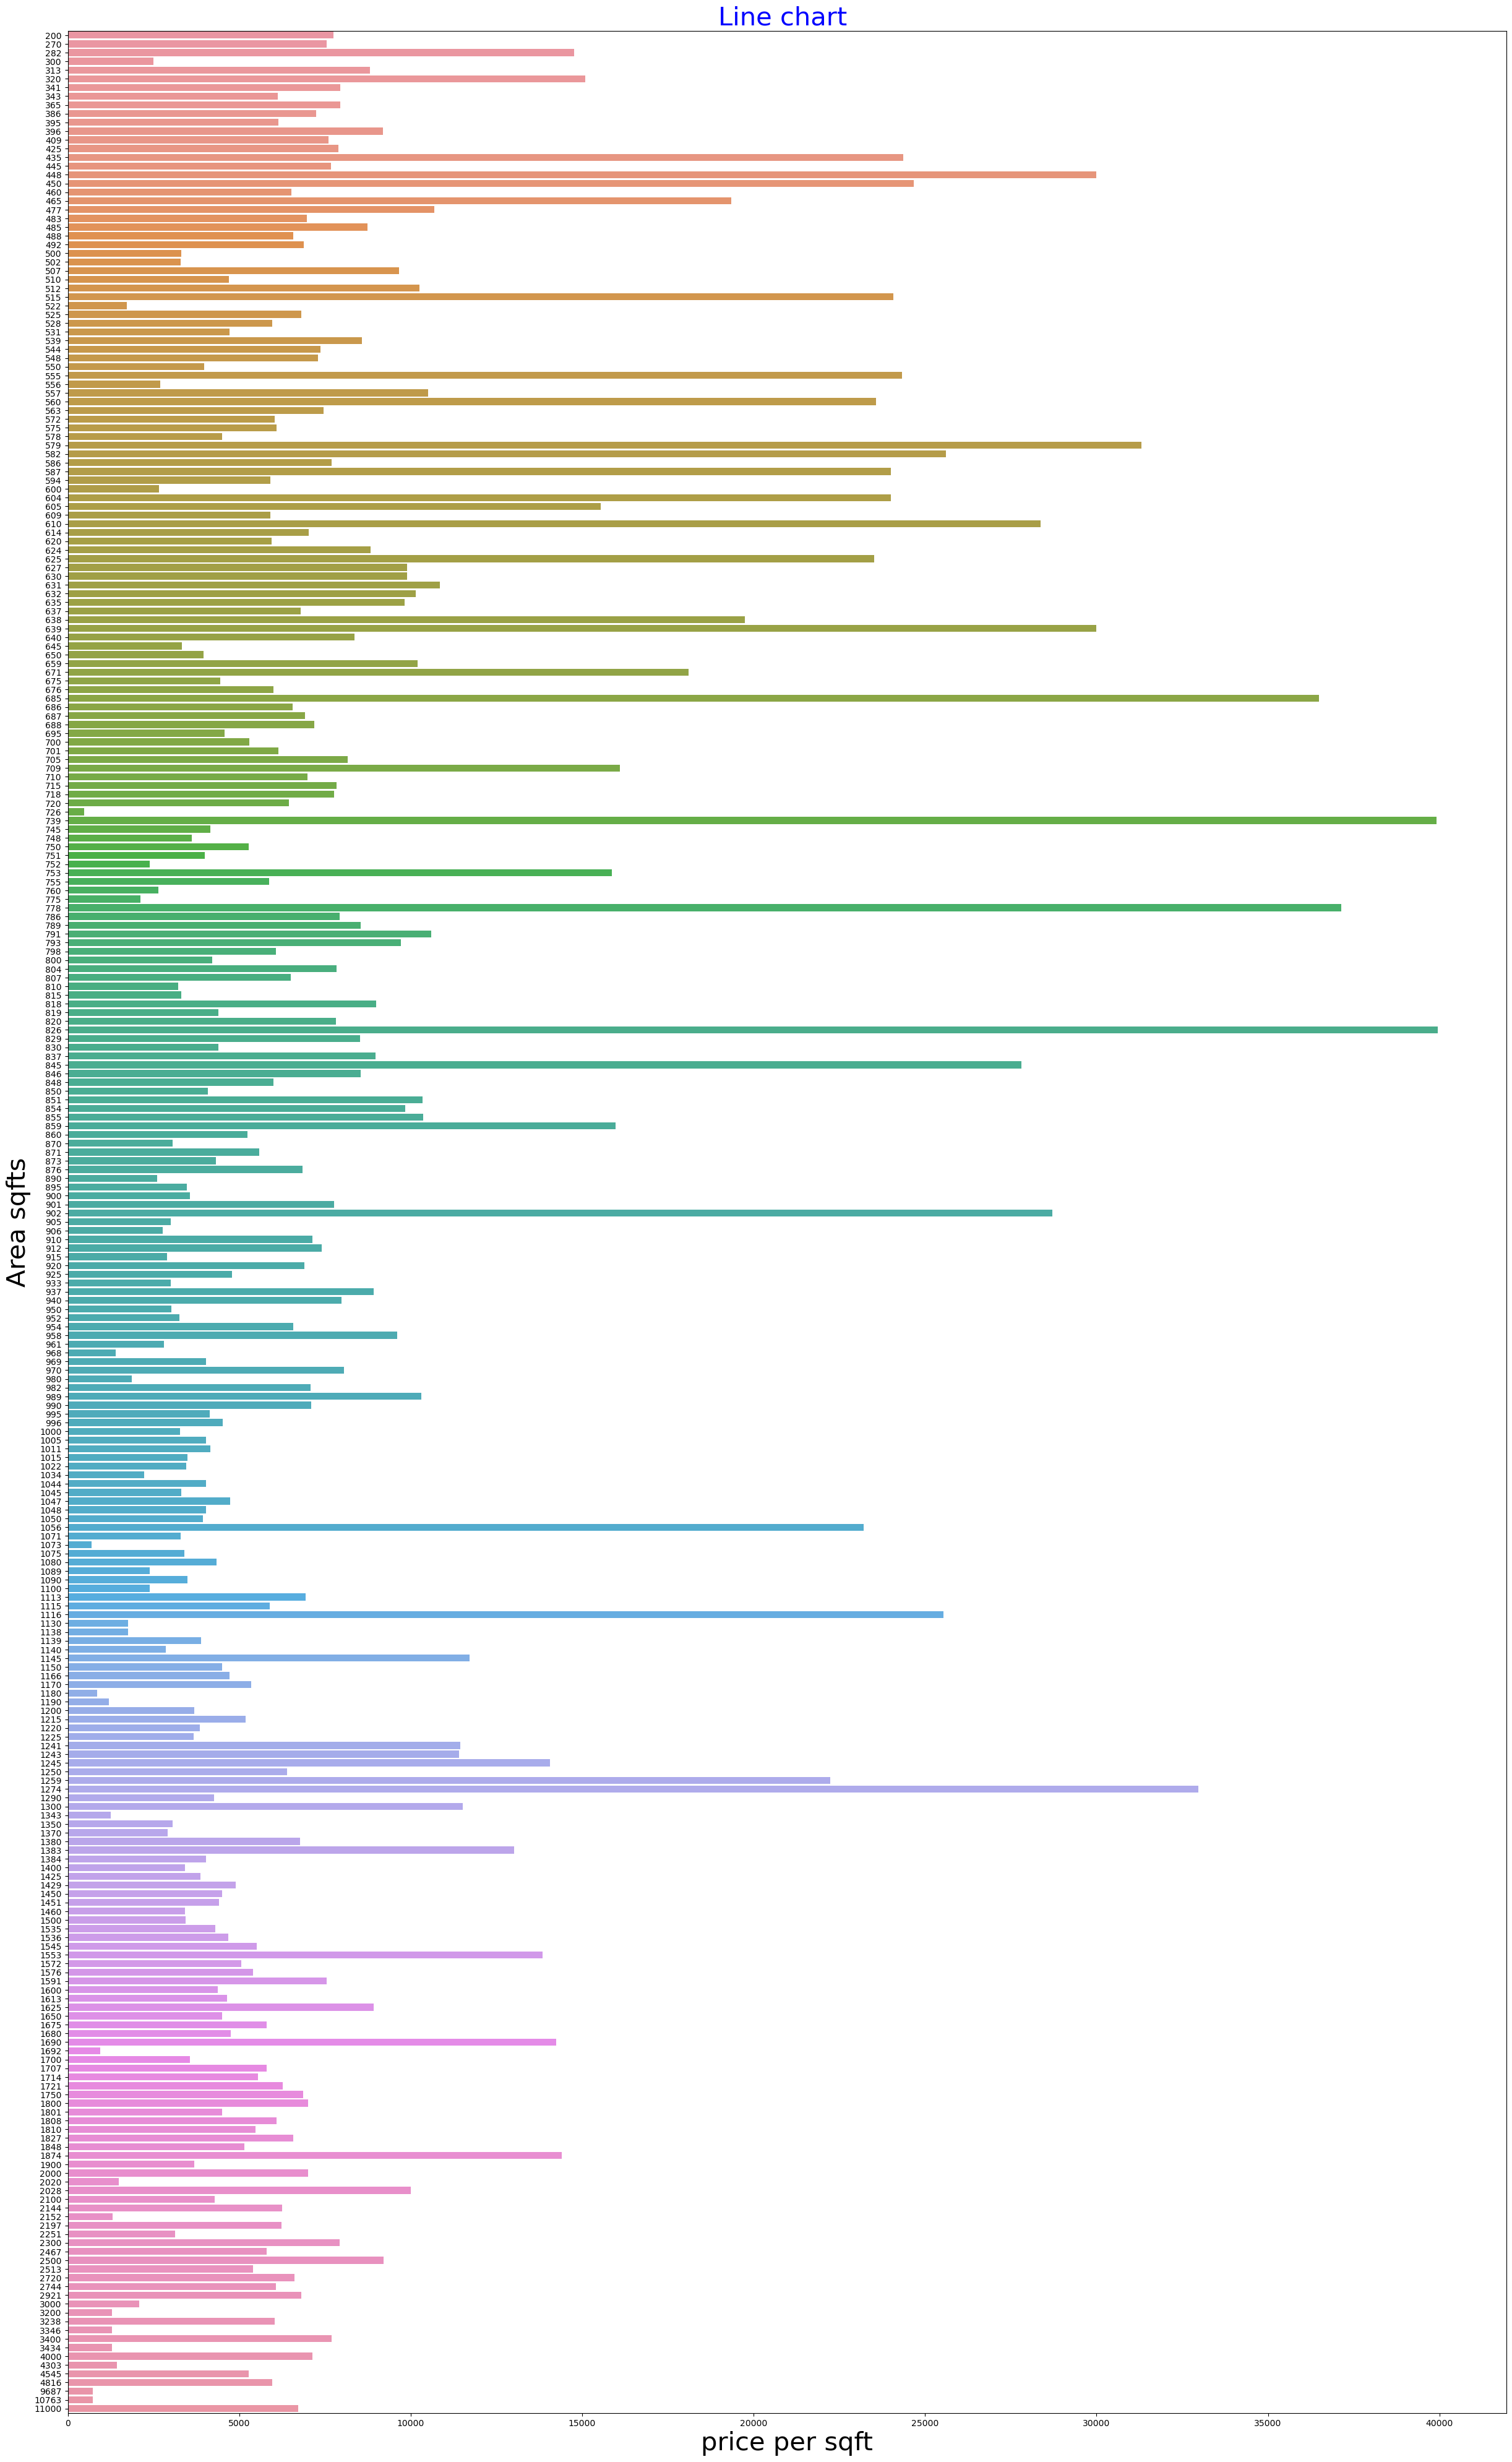

In [43]:
## Bivariate 

plt.figure(figsize=(30,50),dpi = 100)
sns.barplot(y='Area_sqft', x='price_per_sqft', data= df_final, ci= False, orient = 'h')
plt.title('Line chart ', fontsize = 30, color = 'b')
plt.xlabel('price per sqft',fontsize = 30, color = 'black')
plt.ylabel('Area sqfts',fontsize = 30, color = 'black');
plt.show()

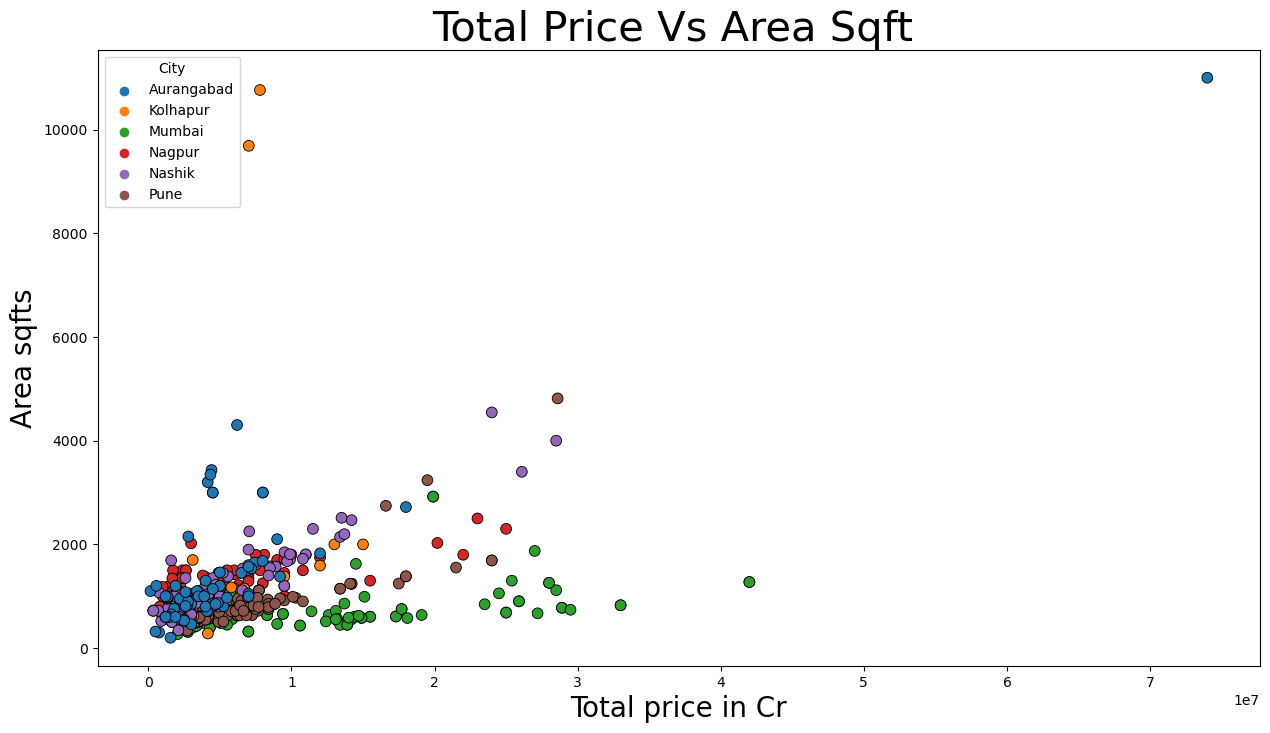

In [44]:
# totalprice VS Area Sqft(Multi-variate) using scatter plot.

plt.figure(figsize=(15,8))
sns.scatterplot(y = 'Area_sqft' , x ='Total_Price',hue = 'City', markers = "^",data = df_final, edgecolor ="black", s = 60 )
plt.title('Total Price Vs Area Sqft ', fontsize = 30, color = 'black')
plt.xlabel('Total price in Cr',fontsize = 20, color = 'black')
plt.ylabel('Area sqfts',fontsize = 20, color = 'black');
plt.show()

In [45]:
# this shows that most of the sites in most of the cities are of 0-2000sqft and their price is around 1cr
# mumbai is having more prices as compared to other cities as for the sites of 0-2000 sqft it is costing between 1-3cr 
# this shows that homes are more costlier in mumbai as compared to others

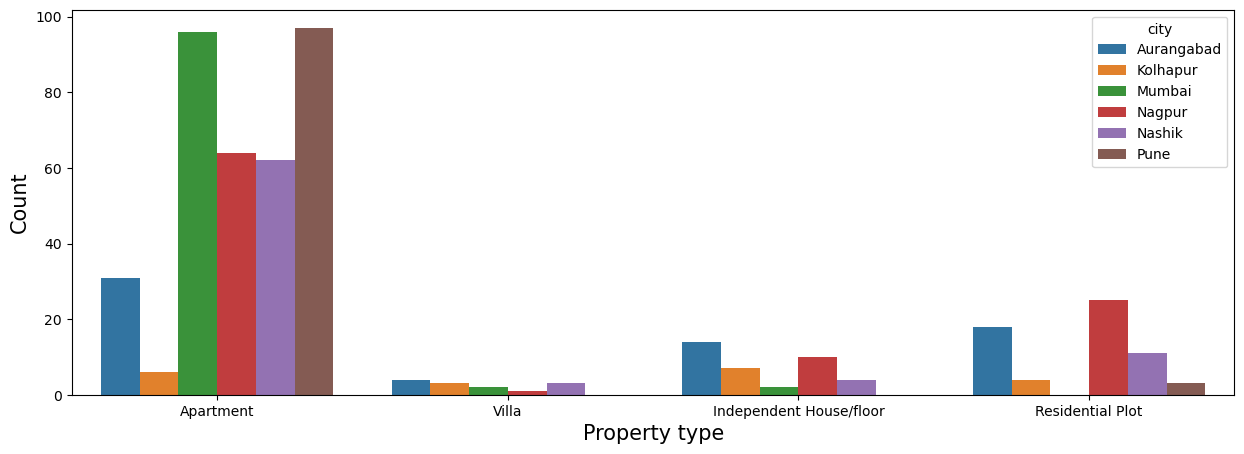

In [46]:
# countplot/ side-by-side histogram showing Properties availble in different cities 

plt.figure(figsize =(15,5))
sns.countplot(x= 'prop_name', hue = 'city', data = df_prop)
plt.title('', fontsize = 25, color = 'black')
plt.xlabel('Property type',fontsize = 15, color = 'black')
plt.ylabel('Count',fontsize = 15, color = 'black');
plt.show()

In [47]:
# from this we can say that all cities has more number of Apartments compared to other properties
# Kolhapur consists more number of Independent Houses rather than Apartments.

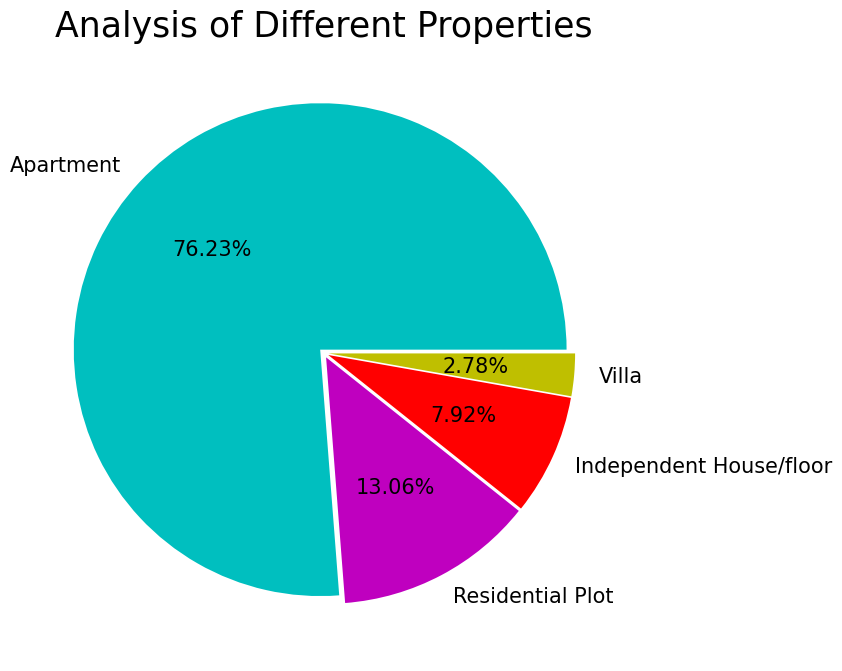

In [48]:
# Analysis of Different Properties

plt.figure(figsize = (8,8))
colors = ["c", 'm','r','y','g']
plt.pie(x = df_prop.prop_name.value_counts().values,
        labels = df_prop.prop_name.value_counts().index, autopct = '%.2f%%',explode= [0.02,0.02,0.02,0.02],
       colors = colors, textprops={"fontsize":15})
plt.title('Analysis of Different Properties', fontsize = 25, color = 'black')

plt.show();

In [49]:
# From here we can say that the most number of sites are Apartment which is around 77% means 1/3rd
# then comes Residential Plots which consists 13% of all sites
# and then comes Independent House/Floor which consists of 8% of all sites
# and atlast comes Villas which consists around 3% of all sites

<Figure size 1500x500 with 0 Axes>

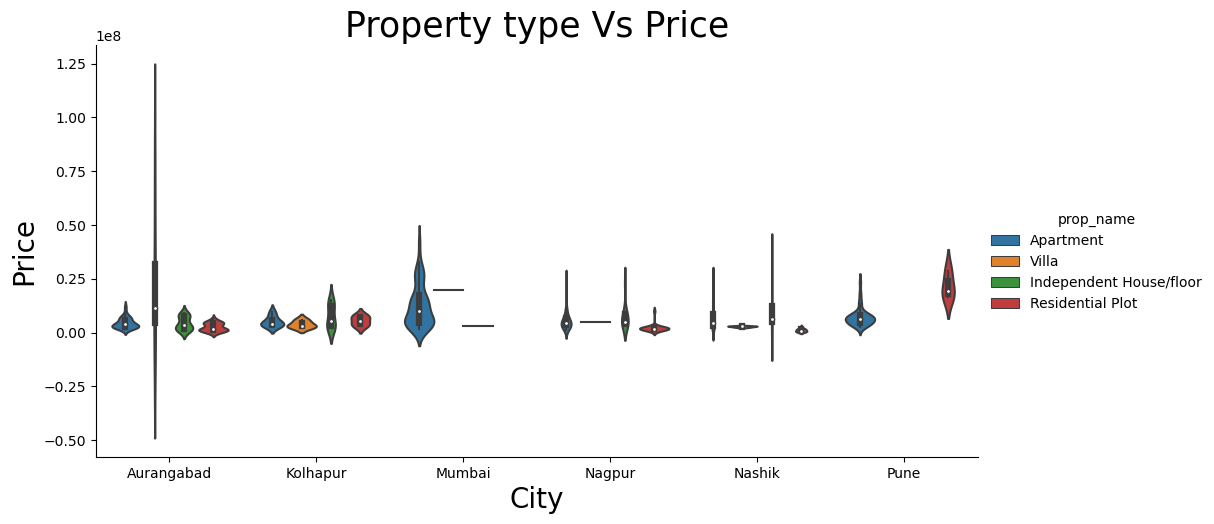

In [50]:
# Property type Vs Price using violin plot

plt.figure(figsize=(15,5))
sns.catplot(data = df_prop, x = 'city', y = 'price',hue = "prop_name", kind = 'violin', aspect=2 );
plt.title('Property type Vs Price', fontsize = 25, color = 'black',)
plt.xlabel('City',fontsize = 20, color = 'black')
plt.ylabel('Price',fontsize = 20, color = 'black');
plt.show()

In [51]:
# From here we can say that there are more number of villas in Aurangabad
# Also there are only apartments in Mumbai and not any ohter site
# in Nagpur also there are no Villas and very less Residential plots
# In Pune there are no Villas and Residential plots.

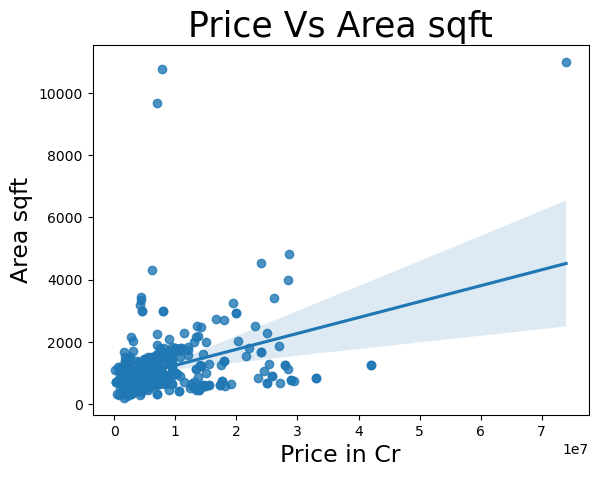

In [52]:
# Price Vs Area sqft

sns.regplot(data = df_final , x='Total_Price', y ='Area_sqft')
plt.title('Price Vs Area sqft', fontsize = 25, color = 'black')
plt.xlabel('Price in Cr',fontsize = 17, color = 'black')
plt.ylabel('Area sqft',fontsize = 17, color = 'black');
plt.show()

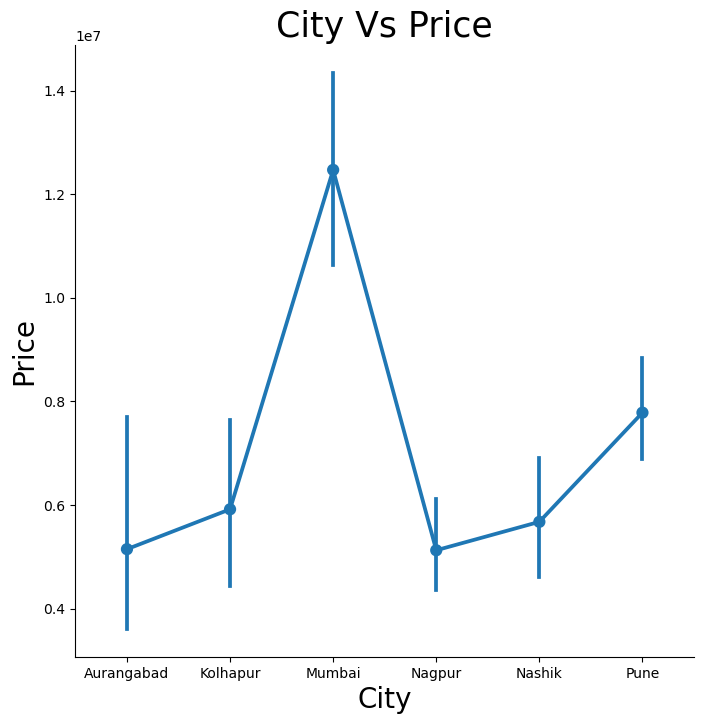

In [53]:
# City Vs Price using point plot

# plt.figure(size = (15,5), dpi = 200)
sns.catplot(data = df_prop, x = 'city', y = 'price', kind = 'point', height = 7)
plt.title('City Vs Price', fontsize = 25, color = 'black')
plt.xlabel('City',fontsize = 20, color = 'black')
plt.ylabel('Price',fontsize = 20, color = 'black');
plt.show()

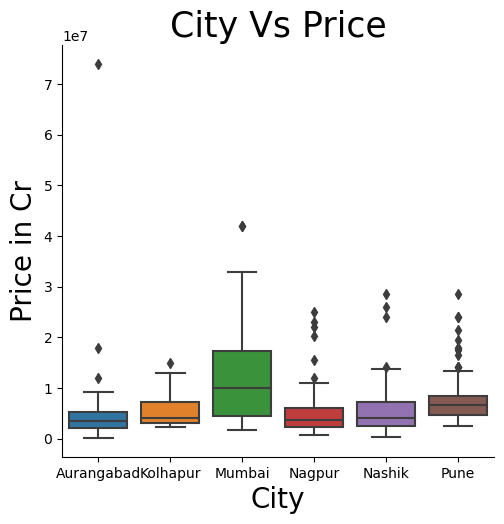

In [54]:
# City Vs Price using box plot

sns.catplot(data = df_prop, x = 'city', y = 'price', kind = 'box')
plt.title('City Vs Price', fontsize = 25, color = 'black')
plt.xlabel('City',fontsize = 20, color = 'black')
plt.ylabel('Price in Cr',fontsize = 20, color = 'black');
plt.show()

In [55]:
corr=df_final.corr()

In [56]:
corr

,Total_Price,price_per_sqft,Area_sqft
Total_Price,1.000000,0.698482,0.385169
price_per_sqft,0.698482,1.000000,-0.177552
Area_sqft,0.385169,-0.177552,1.000000


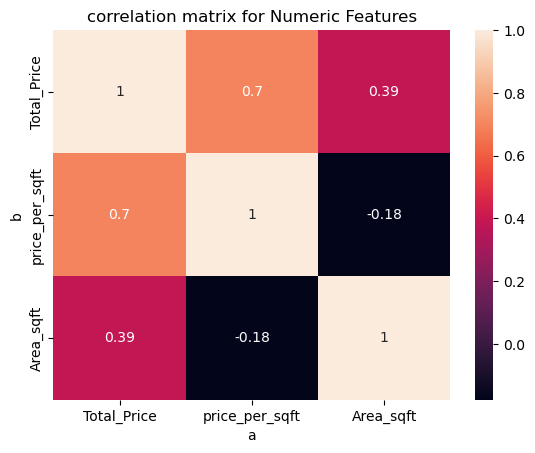

In [57]:
sns.heatmap(corr,annot=True)
plt.title("correlation matrix for Numeric Features")
plt.xlabel("a")
plt.ylabel("b")
plt.show()

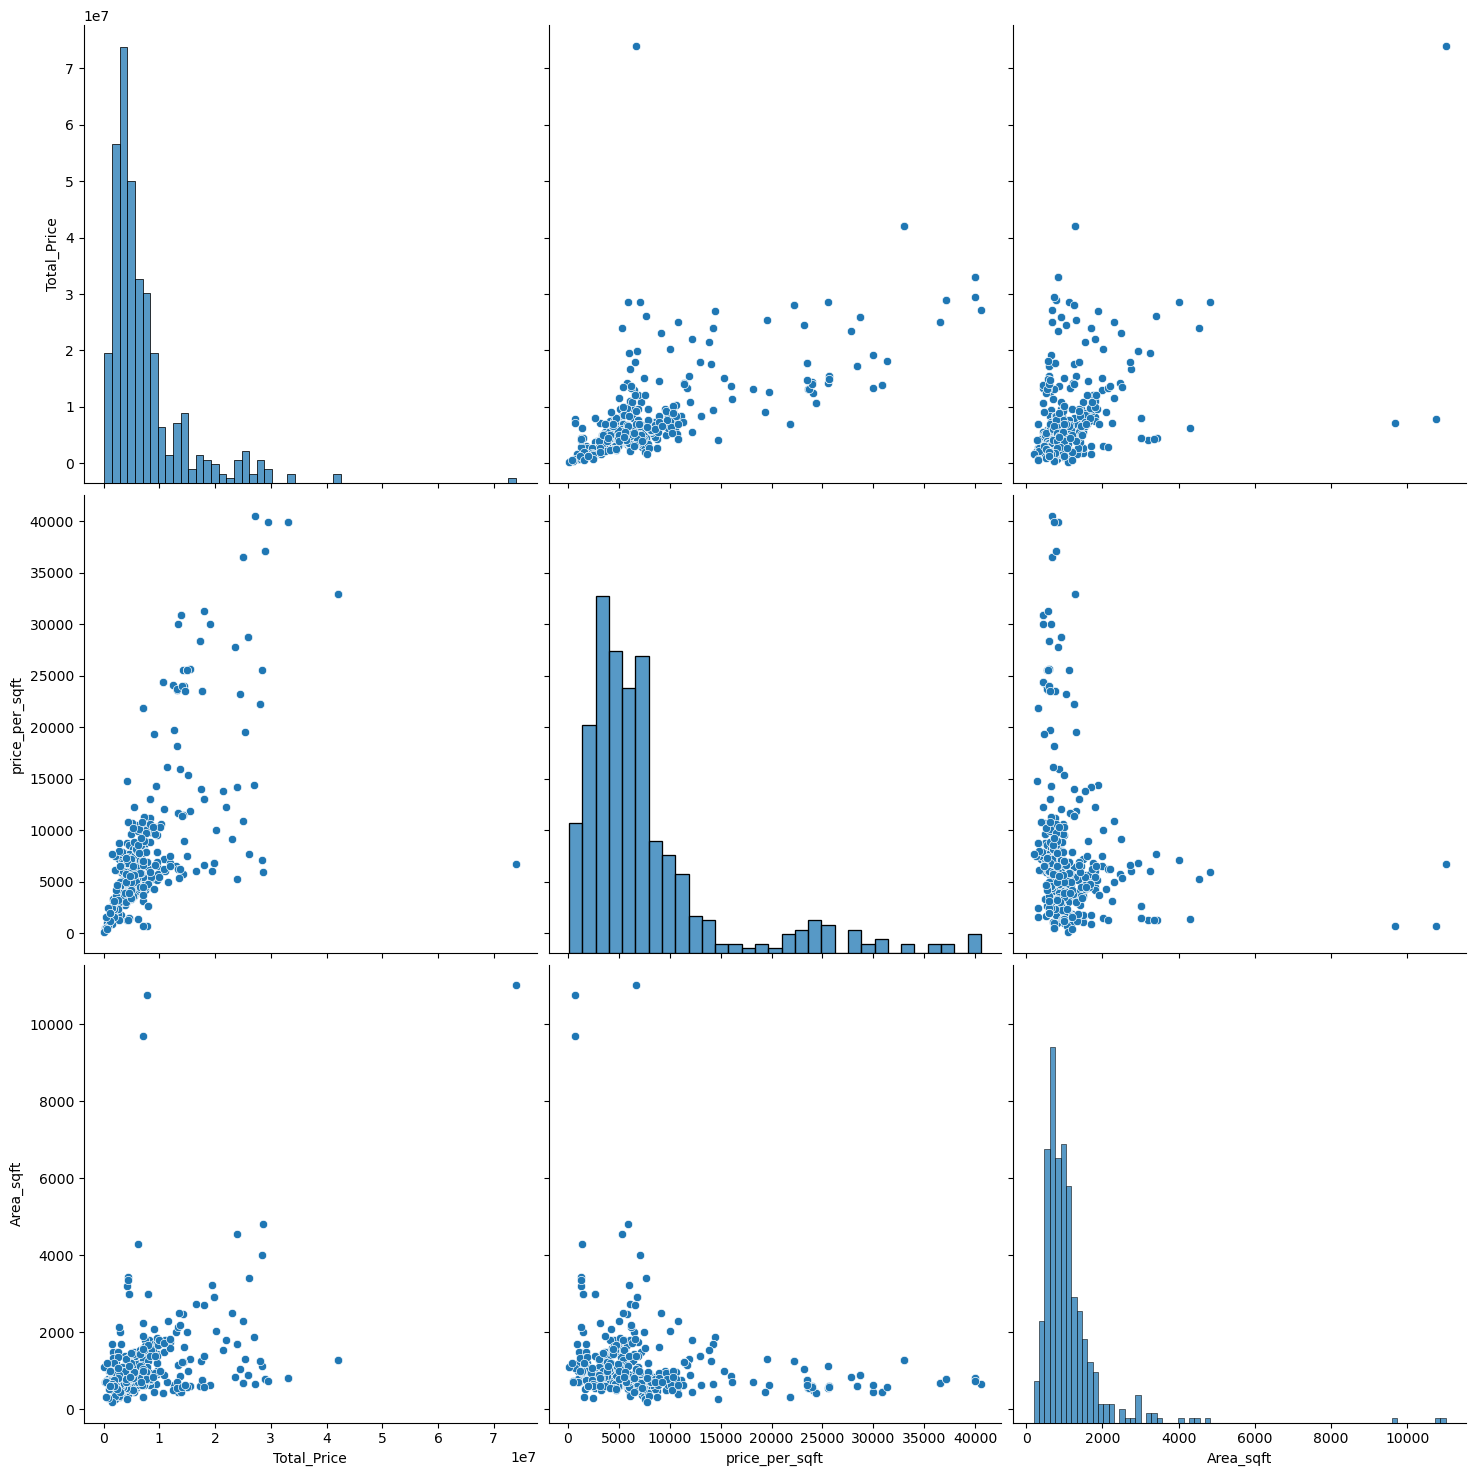

In [73]:
sns.pairplot(data=df_final, height=5)
plt.show()

In [61]:
# A density plot is a smoothed, continuous version of a histogram estimated from the data.
#The most common form of estimation is known as kernel density estimation.

#Bar plots look similar to count plots, but instead of the count of observations in each category, 
#they show the mean of a quantitative variable among observations in each category.

# histogram does not have space between the bins but countplot gives space between the bins